<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 

<center> <h2>Autor: Ivanovich Ciro Figueroa Salazar</h2> </center> 

<center> <h1>Curso : Computación 2</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h1>EDA BIVARIADO</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

## <font color=#33A5FF>****1. Análisis Exploratorio de Datos - Practicamos Análisis Univariado****<tfont>

## 1.1.- Cargamos los datos `German Credit`

#### Librerías

In [1]:
# importar las librerias
import pandas as pd
from qgrid import show_grid

#### Archivo `csv`

In [2]:
data = pd.read_csv('data/german_credit_data.csv')

# Fuente: https://www.kaggle.com/uciml/german-credit

In [3]:
show_grid(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## 1.2.- Estado de salud de un dataframe

In [4]:
from funpymodeling.exploratory import freq_tbl, status, profiling_num

In [5]:
#Saving_accounts = Cuenta de Ahorros, Checking_acoount = cuenta de cheques
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.000,0,0.000,53,int64
1,Sex,0,0.000,0,0.000,2,object
2,Job,0,0.000,22,0.022,4,int64
3,Housing,0,0.000,0,0.000,3,object
4,Saving_accounts,183,0.183,0,0.000,4,object
5,Checking_account,394,0.394,0,0.000,3,object
6,Credit_amount,0,0.000,0,0.000,921,int64
7,Duration,0,0.000,0,0.000,33,int64
8,Purpose,0,0.000,0,0.000,8,object
9,Risk,0,0.000,0,0.000,2,object


## 1.3.- Variables Numéricas

### Graficos/Histogramas

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Job'}>],
       [<AxesSubplot:title={'center':'Credit_amount'}>,
        <AxesSubplot:title={'center':'Duration'}>]], dtype=object)

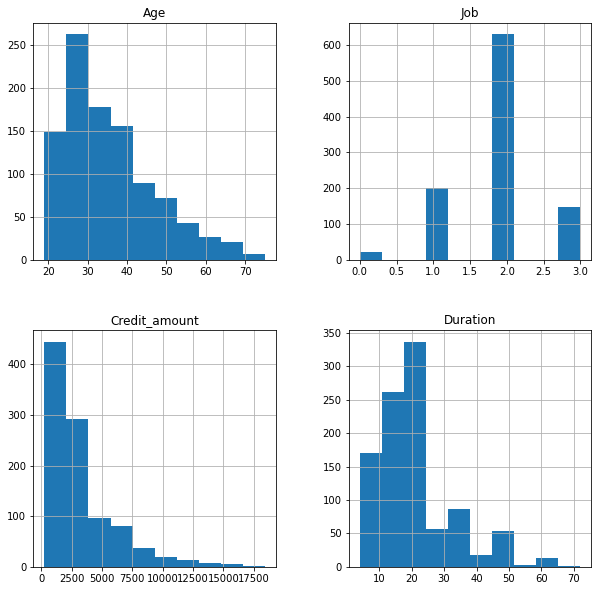

In [6]:
data.hist(figsize = (10,10))

#### De librería `funPyModeling` -  `profiling_num` Estadística mejorada

In [7]:
data['Job'] = data['Job'].astype('str')
status(data['Job'])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Job,0,0.0,0,0.0,4,object


### Análisis cuantitativo / descripción estadística:

In [8]:
#variation_coef ==>>> nos indica que no hay outliners(valores atipicos)
profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Age,35.546,11.375469,0.320021,20.00,22.00,27.0,33.0,42.00,60.0,67.01
1,Credit_amount,3271.258,2822.736876,0.862890,425.83,708.95,1365.5,2319.5,3972.25,9162.7,14180.39
2,Duration,20.903,12.058814,0.576894,6.00,6.00,12.0,18.0,24.00,48.0,60.00


---

## 1.4.- Análisis de Variables Categóricas

### Funcion `freq_tbl` de `funpymodeling`

In [9]:
#funcion admite variables categoricas
freq_tbl(data['Job'])

,Job,frequency,percentage,cumulative_perc
0,2,630,0.630,0.630
1,1,200,0.200,0.830
2,3,148,0.148,0.978
3,0,22,0.022,1.000


In [10]:
freq_tbl(data)

      Sex  frequency  percentage  cumulative_perc
0    male        690        0.69             0.69
1  female        310        0.31             1.00

----------------------------------------------------------------

  Job  frequency  percentage  cumulative_perc
0   2        630       0.630            0.630
1   1        200       0.200            0.830
2   3        148       0.148            0.978
3   0         22       0.022            1.000

----------------------------------------------------------------

  Housing  frequency  percentage  cumulative_perc
0     own        713       0.713            0.713
1    rent        179       0.179            0.892
2    free        108       0.108            1.000

----------------------------------------------------------------

  Saving_accounts  frequency  percentage  cumulative_perc
0          little        603       0.603         0.738066
1        moderate        103       0.103         0.864137
2      quite rich         63       0.063     

### Graficos de barras

In [11]:
from funpymodeling.exploratory import cat_vars, num_vars

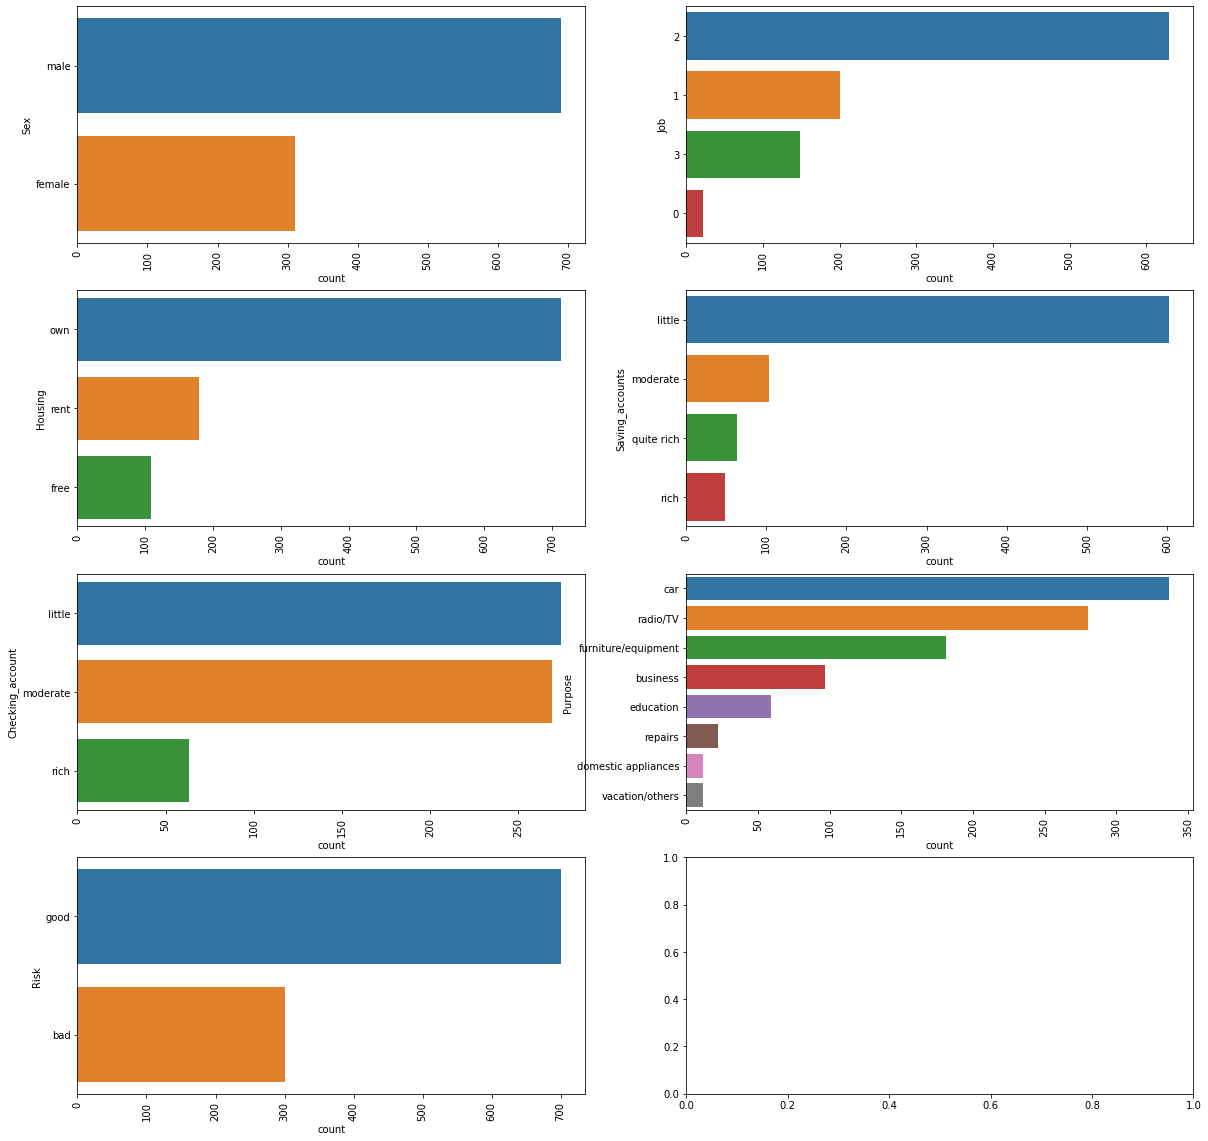

In [12]:
# Esta funcion estara en funpymodeling como freq() o plot_freq()
# NOTA: antes de usar este script, saquen las variables que tienen mas de 100 categorias distintas
import matplotlib.pyplot as plt
import seaborn as sns

d_plot = data
fig, ax = plt.subplots(4, 2, figsize = (20, 20))
for variable, subplot in zip(cat_vars(d_plot), ax.flatten()):
    sns.countplot(y = d_plot[variable], ax=subplot, order = d_plot[variable].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## <font color=#33A5FF>****2. Análisis Exploratorio de Datos - Analisis Bivariado****<tfont>

### ¿Cual es la relacion entre "saving accounts" y "housing"? (ahorros vs posee casa)

## 2.A. Categórica vs categorica

#### Utilizamos pandas `pd.crosstab(v1, v2)`

In [13]:
pd.crosstab(data.Saving_accounts, data.Risk)

Risk,bad,good
Saving_accounts,,
little,217,386
moderate,34,69
quite rich,11,52
rich,6,42


In [14]:
pd.crosstab(data.Saving_accounts, data.Risk, margins = True)

Risk,bad,good,All
Saving_accounts,,,
little,217,386,603
moderate,34,69,103
quite rich,11,52,63
rich,6,42,48
All,268,549,817


### Porcentajes totales (suma de celdas 100%)

In [15]:
pd.crosstab(data.Saving_accounts, data.Risk, normalize = True)

Risk,bad,good
Saving_accounts,,
little,0.265606,0.472460
moderate,0.041616,0.084455
quite rich,0.013464,0.063647
rich,0.007344,0.051408


### Porcentajes por registro (util para seleccion de variables)

In [16]:
pd.crosstab(data.Saving_accounts, data.Risk, normalize='index', margins=True)

Risk,bad,good
Saving_accounts,,
little,0.359867,0.640133
moderate,0.330097,0.669903
quite rich,0.174603,0.825397
rich,0.125000,0.875000
All,0.328029,0.671971


<div class="alert alert-info">

  En esta etápa se realiza el análisis de:

    
    
 <strong>Nota:</strong> Se uso la notacion de punto como simple demostracion, de ahora en más se usará la notacion de corchetes por dos motivos: En vez de `data.Risk`, usar `data['Risk`]. Son mas caracteres de tipeo pero se estandariza el codigo.
    
- No se puede usar para crear <strong>crear columnas nuevas</strong>
- No funciona si las <strong>variables tienen espacios</strong>
  
    
</div>

### Evitar sesgos por representatividad (caso rich):

In [17]:
#analisis de respresentatividad:
pd.crosstab(data['Saving_accounts'], data['Risk'], margins=True, normalize = True)

Risk,bad,good,All
Saving_accounts,,,
little,0.265606,0.472460,0.738066
moderate,0.041616,0.084455,0.126071
quite rich,0.013464,0.063647,0.077111
rich,0.007344,0.051408,0.058752
All,0.328029,0.671971,1.000000


## 2.B. Analisis numerica vs categorica

### ¿Cambia la edad de acuerdo al proposito de credito?

In [18]:
data.groupby('Purpose')['Age'].mean()

Purpose
business               35.484536
car                    37.139466
domestic appliances    34.250000
education              38.288136
furniture/equipment    32.458564
radio/TV               34.700000
repairs                38.545455
vacation/others        39.916667
Name: Age, dtype: float64

In [19]:
#ordenar los valores
data.groupby('Purpose')['Age'].mean().sort_values(ascending=False)

Purpose
vacation/others        39.916667
repairs                38.545455
education              38.288136
car                    37.139466
business               35.484536
radio/TV               34.700000
domestic appliances    34.250000
furniture/equipment    32.458564
Name: Age, dtype: float64

### Un análisis detallado

In [20]:
data.groupby('Purpose')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Purpose,,,,,,,,
business,97.0,35.484536,11.401858,21.0,27.0,33.0,39.00,74.0
car,337.0,37.139466,11.649960,20.0,28.0,35.0,43.00,75.0
domestic appliances,12.0,34.250000,13.376540,22.0,24.0,28.0,39.50,62.0
education,59.0,38.288136,11.555042,21.0,30.5,36.0,46.50,67.0
furniture/equipment,181.0,32.458564,9.747632,19.0,25.0,30.0,39.00,63.0
radio/TV,280.0,34.700000,11.142736,20.0,26.0,32.0,40.25,67.0
repairs,22.0,38.545455,14.879603,22.0,25.5,33.5,48.00,67.0
vacation/others,12.0,39.916667,11.325421,27.0,30.5,39.5,45.00,60.0


### Pormedio de todas las variables, por nuestra variable a predecir

In [21]:
data.groupby('Risk').mean()

,Age,Credit_amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


## 2.C. Analisis de numerica vs numerica

### Opc 1: Hay que discretizar una variable (numerica vs categorica)

### Opc 2: Se discretiza las dos (categorica vs categorica)

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****3. Graficos de Analisis Exploratorio de Datos Bivarido****<tfont>

### 3.A. Analisis de numerica vs categorica

<AxesSubplot:xlabel='Purpose', ylabel='Age'>

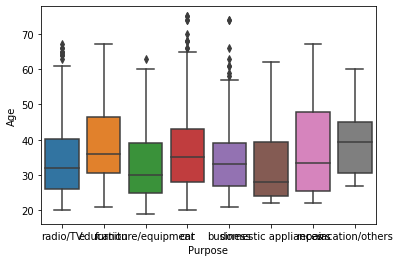

In [22]:
import seaborn as sns
sns.boxplot(y = 'Age', x = 'Purpose', data = data)

#### Tarea:

- Ordenar ascentemente por la mediana
- Visulizar bien los label

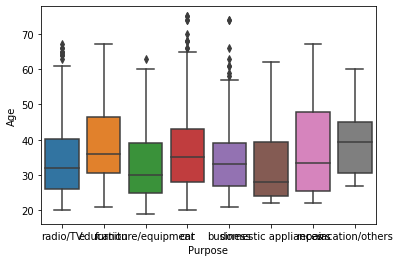

### Si queremos ver mejor las distribuciones, grafico de violin.

<AxesSubplot:xlabel='Purpose', ylabel='Age'>

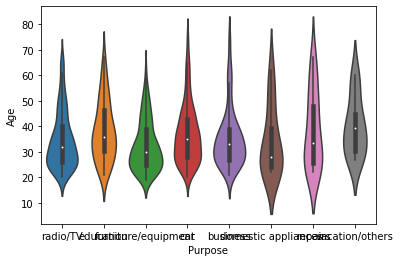

In [23]:
sns.violinplot(y = 'Age', x = 'Purpose', data = data)

#### Tarea:

- Ordenar ascentemente por la mediana
- Visulizar bien los label

### 3.B. Analisis de categorica vs categorica

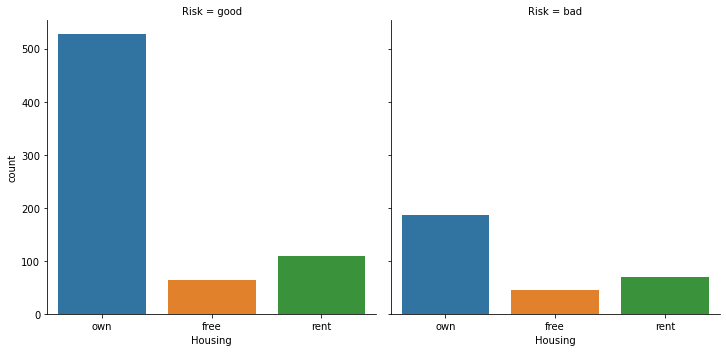

In [24]:
g = sns.catplot(x='Housing',
               col = 'Risk',
               data = data,
               kind='count')

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****BIBLIOGRAFÍA****<tfont>

[1] Documentación oficial de `seaborn`: https://seaborn.pydata.org/introduction.html

[2] ¿Por qué se carga como sns? https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns

[3] Libro de Ciencia de Datos - librería `funModeling` https://librovivodecienciadedatos.ai/

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)